In [1]:
from collections import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import linear_model

# DATA CLEANING --same for all parts

file_path = "Top_1000_IMDb_movies_New_version.csv"
data = pd.read_csv(file_path, header=0)
clean_data = data.copy()
clean_data = clean_data.replace("#222", "72.5")

# convert format "II 2019" to "2019"
def convert_string(x):
    if x[0] == 'I':
        return x[-4:]
    else:
        return x
clean_data["Year of Release"] = clean_data["Year of Release"].apply(convert_string)

# convert votes to numbers
def convert_to_int(x):
    return int(x.replace(',', ''))
clean_data["Votes"] = clean_data["Votes"].apply(convert_to_int)

# calculate means
Wt_mean = clean_data["Watch Time"].mean()
Rating_mean = clean_data["Movie Rating"].mean()
score_mean = clean_data["Metascore of movie"].mean()
revenue_mean = clean_data["Gross"].apply(float).mean()
votes_mean = clean_data["Votes"].mean()

# Data filling with mean values
clean_data["Watch Time"] = clean_data["Watch Time"].fillna(Wt_mean)
clean_data["Movie Rating"] = clean_data["Movie Rating"].fillna(Rating_mean)
clean_data["Metascore of movie"] = clean_data["Metascore of movie"].fillna(score_mean)
clean_data["Gross"] = clean_data["Gross"].fillna(revenue_mean)
clean_data["Votes"] = clean_data["Votes"].fillna(votes_mean)


print("Shape before clean: ", data.shape)
print("Shape after clean: ", clean_data.shape)

# words and counts in each description
count = Counter()
desc_words = clean_data["Description"].str.split()
for i in desc_words:
    count.update(i)
desc_wc = clean_data["Description"].str.split().apply(len)

Shape before clean:  (1000, 9)
Shape after clean:  (1000, 9)


Text(0, 0.5, 'KDE')

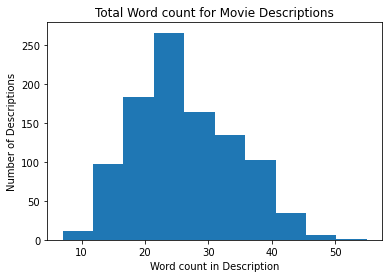

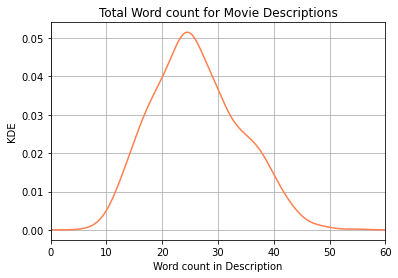

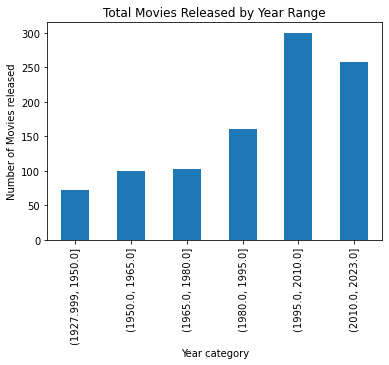

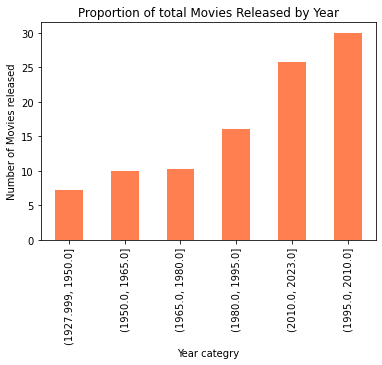

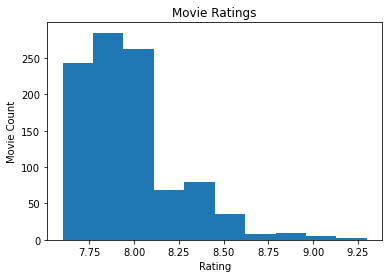

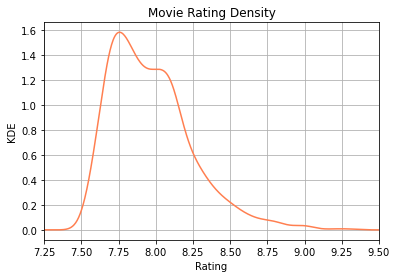

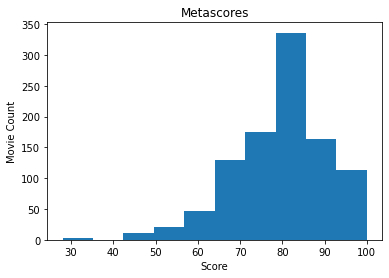

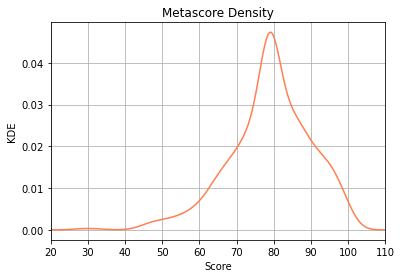

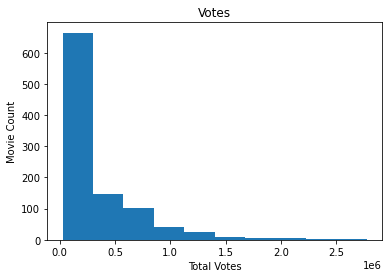

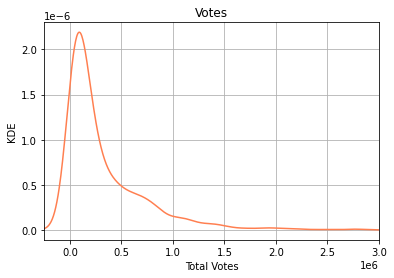

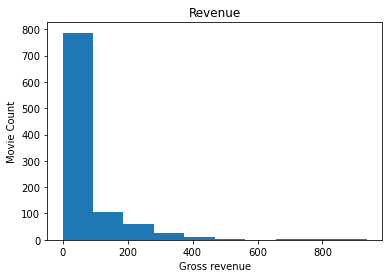

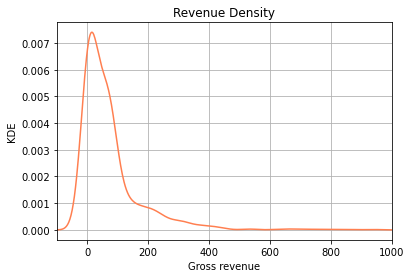

In [5]:
# II: Probabilities

#---UNIVARIATE---
# Shows data spread/distribution
# distribution of words used in descriptions
plt.figure()
plt.hist(desc_wc)
plt.title("Total Word count for Movie Descriptions")
plt.xlabel("Word count in Description")
plt.ylabel("Number of Descriptions")

plt.figure()
desc_wc.plot.density(color="coral")
plt.xlim(0, 60)
plt.grid()
plt.title("Total Word count for Movie Descriptions")
plt.xlabel("Word count in Description")
plt.ylabel("KDE")

# Histogram of Years movies were released
vals = clean_data["Year of Release"].apply(int)
counts = vals.value_counts(sort=False, bins=[1928, 1950, 1965, 1980, 1995, 2010, 2023])
props = counts.apply(lambda x: x/10)
props = props.sort_values()

plt.figure()
counts.plot(kind="bar")
plt.title("Total Movies Released by Year Range")
plt.xlabel("Year category")
plt.ylabel("Number of Movies released")

plt.figure()
props.plot(kind="bar", color="coral")
plt.title("Proportion of total Movies Released by Year")
plt.xlabel("Year categry")
plt.ylabel("Number of Movies released")

# Ratings
plt.figure()
plt.hist(clean_data["Movie Rating"])
plt.title("Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Movie Count")

plt.figure()
clean_data["Movie Rating"].plot.density(color="coral")
plt.xlim(7.25, 9.5)
plt.grid()
plt.title("Movie Rating Density")
plt.xlabel("Rating")
plt.ylabel("KDE")

# Metascores
plt.figure()
plt.hist(clean_data["Metascore of movie"])
plt.title("Metascores")
plt.xlabel("Score")
plt.ylabel("Movie Count")

plt.figure()
clean_data["Metascore of movie"].plot.density(color="coral")
plt.xlim(20, 110)
plt.grid()
plt.title("Metascore Density")
plt.xlabel("Score")
plt.ylabel("KDE")

# Votes
plt.figure()
plt.hist(clean_data["Votes"])
plt.title("Votes")
plt.xlabel("Total Votes")
plt.ylabel("Movie Count")

plt.figure()
clean_data["Votes"].plot.density(color="coral")
plt.xlim(-0.25e6, 3e6)
plt.grid()
plt.title("Votes")
plt.xlabel("Total Votes")
plt.ylabel("KDE")

# Gross
plt.figure()
plt.hist(clean_data["Gross"].apply(float))
plt.title("Revenue")
plt.xlabel("Gross revenue")
plt.ylabel("Movie Count")

plt.figure()
clean_data["Gross"].apply(float).plot.density(color="coral")
plt.xlim(-100, 1000)
plt.grid()
plt.title("Revenue Density")
plt.xlabel("Gross revenue")
plt.ylabel("KDE")


Text(0, 0.5, 'Votes')

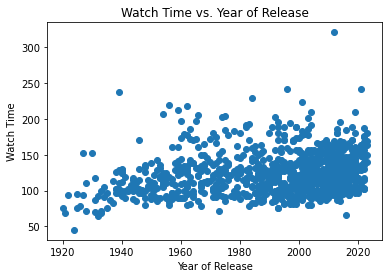

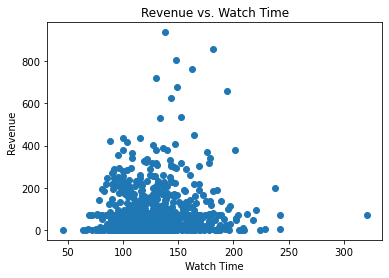

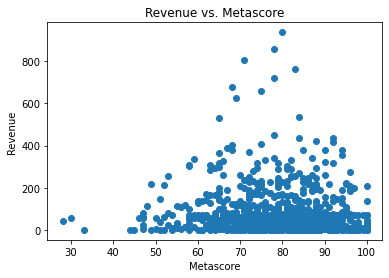

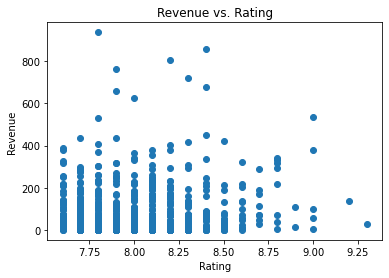

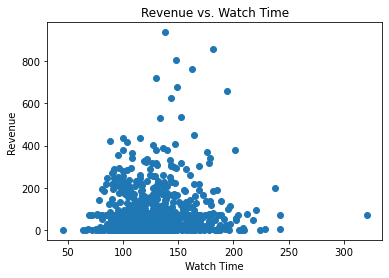

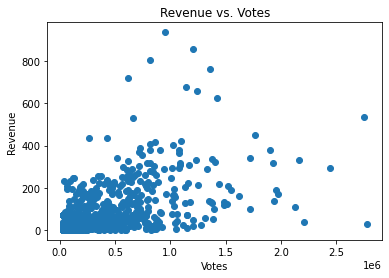

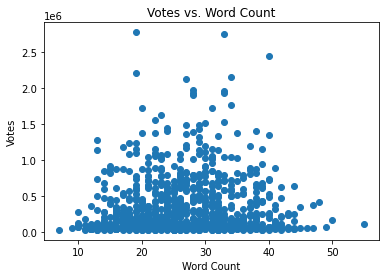

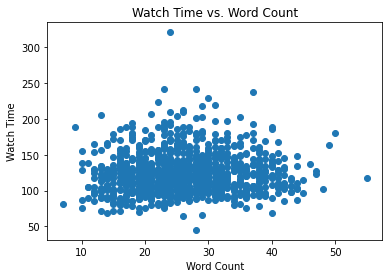

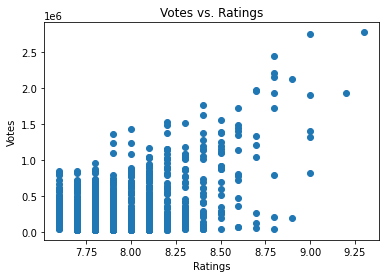

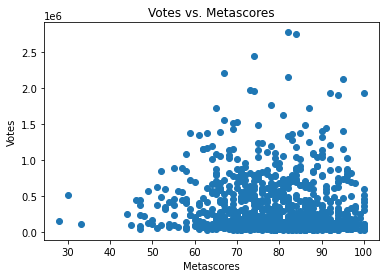

In [6]:
#---MULTIVARIATE---
# Used for Hypothesis Testing

# compare to Gross as a function of watch time
vals = clean_data["Year of Release"].apply(int)
x = clean_data["Year of Release"].apply(int).to_numpy()
y = clean_data["Watch Time"].to_numpy()

plt.figure()
plt.plot(x, y, 'o')
plt.title("Watch Time vs. Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Watch Time")

x = clean_data["Watch Time"].to_numpy()
y = clean_data["Gross"].apply(float).to_numpy()
plt.figure()
plt.plot(x, y, 'o')
plt.title("Revenue vs. Watch Time")
plt.ylabel("Revenue")
plt.xlabel("Watch Time")


# Revenue vs Other feature comparisons
y = clean_data["Gross"].apply(float).to_numpy()
features = ["Metascore of movie", "Movie Rating", "Watch Time", "Votes"]
for x in features:
    xvar = clean_data[x].to_numpy()

plt.figure()
x = clean_data[features[0]]
plt.plot(x, y, 'o')
plt.title("Revenue vs. Metascore")
plt.xlabel("Metascore")
plt.ylabel("Revenue")

plt.figure()
x = clean_data[features[1]]
plt.plot(x, y, 'o')
plt.title("Revenue vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Revenue")

plt.figure()
x = clean_data[features[2]]
plt.plot(x, y, 'o')
plt.title("Revenue vs. Watch Time")
plt.xlabel("Watch Time")
plt.ylabel("Revenue")

plt.figure()
x = clean_data[features[3]]
plt.plot(x, y, 'o')
plt.title("Revenue vs. Votes")
plt.xlabel("Votes")
plt.ylabel("Revenue")


# Votes and Watch time against description word counts
plt.figure()
x = desc_wc # word counts for all descriptions
y = clean_data["Votes"]
plt.plot(x, y, 'o')
plt.title("Votes vs. Word Count")
plt.xlabel("Word Count")
plt.ylabel("Votes")

plt.figure()
x = desc_wc # word counts for all descriptions
y = clean_data["Watch Time"]
plt.plot(x, y, 'o')
plt.title("Watch Time vs. Word Count")
plt.xlabel("Word Count")
plt.ylabel("Watch Time")


# Votes vs Ratings for movies
plt.figure()
x = clean_data["Movie Rating"]
y = clean_data["Votes"]
plt.plot(x, y, 'o')
plt.title("Votes vs. Ratings")
plt.xlabel("Ratings")
plt.ylabel("Votes")

plt.figure()
x = clean_data["Metascore of movie"]
y = clean_data["Votes"]
plt.plot(x, y, 'o')
plt.title("Votes vs. Metascores")
plt.xlabel("Metascores")
plt.ylabel("Votes")